#Sujet : Classification des formes geometriques
Les formes avec on va travailler : (Cercle, Carre , Triangle)


#Importation des bibiotheque necessaires

In [ ]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import sklearn
import seaborn as sns
import random

#L'importation du Dateset

In [ ]:
import kagglehub

# Telechargement de la derniere version
path = kagglehub.dataset_download("dineshpiyasamara/geometric-shapes-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/dineshpiyasamara/geometric-shapes-dataset/versions/1


In [ ]:
ls /root/.cache/kagglehub/datasets/dineshpiyasamara/geometric-shapes-dataset/versions/1

'geometric shapes dataset'/


In [ ]:
directory = '/root/.cache/kagglehub/datasets/dineshpiyasamara/geometric-shapes-dataset/versions/1/geometric shapes dataset'

In [ ]:
os.listdir(directory)

['Triangle', 'Circle', 'Square']

In [ ]:
triangles = directory+'/Triangle/'
cerles = directory + '/Circle/'
carre = directory + '/Square/'

Prenons un element de la class triangle

In [ ]:
os.listdir(triangles)[5]

'Triangle_b703b262-2a92-11ea-8123-8363a7ec19e6.png'

Elemenent du classe cercle

In [ ]:
os.listdir(cerles)[8]

'Circle_d6c1e9f6-2a98-11ea-8123-8363a7ec19e6.png'

Elemenent du classe carre

In [ ]:
os.listdir(carre)[16]

'Square_ce7cc370-2a8d-11ea-8123-8363a7ec19e6.png'

Affichant un triangle

In [ ]:
triangle_path = triangles + "/Triangle_b703b262-2a92-11ea-8123-8363a7ec19e6.png"

In [ ]:
triangle_img = imread(triangle_path)

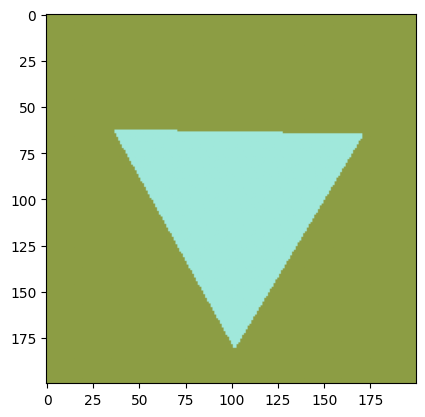

In [ ]:
plt.imshow(triangle_img)

Affichant un cercle

In [ ]:
cercle_path = cerles + "/Circle_d6c1e9f6-2a98-11ea-8123-8363a7ec19e6.png"

In [ ]:
cercle_img = imread(cercle_path)

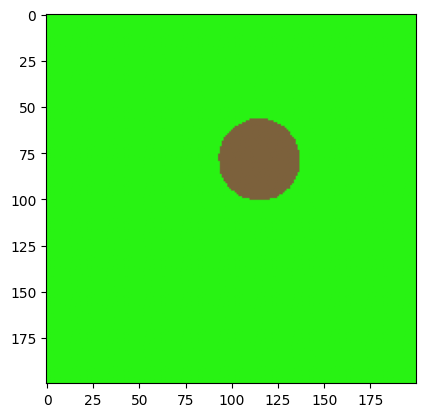

In [ ]:
plt.imshow(cercle_img)

Affichan un carre

In [ ]:
carre_path = carre + "/Square_ce7cc370-2a8d-11ea-8123-8363a7ec19e6.png"

In [ ]:
carre_img = imread(carre_path)

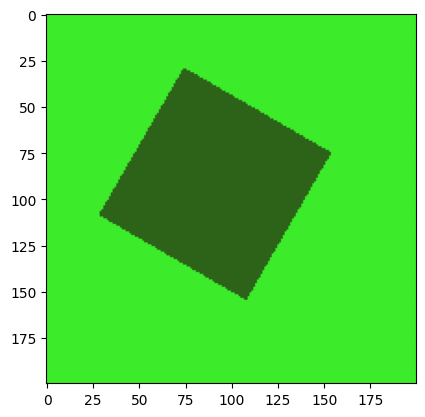

In [ ]:
plt.imshow(carre_img)

Voyant la taille de dimension de chaque forme geometrique

In [ ]:
triangle_img.shape

(200, 200, 3)

In [ ]:
cercle_img.shape

(200, 200, 3)

In [ ]:
carre_img.shape

(200, 200, 3)

Voyant combien de (Triangle, Cercle, et Caree) existe

In [ ]:
len(os.listdir(triangles))

10000

In [ ]:
len(os.listdir(cerles))

10000

In [ ]:
len(os.listdir(carre))

10000

Les dimensions sont unique

In [ ]:
dim1 = []
dim2 = []
for img_filename in os.listdir(triangles):
    img = imread(triangles+'/'+img_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

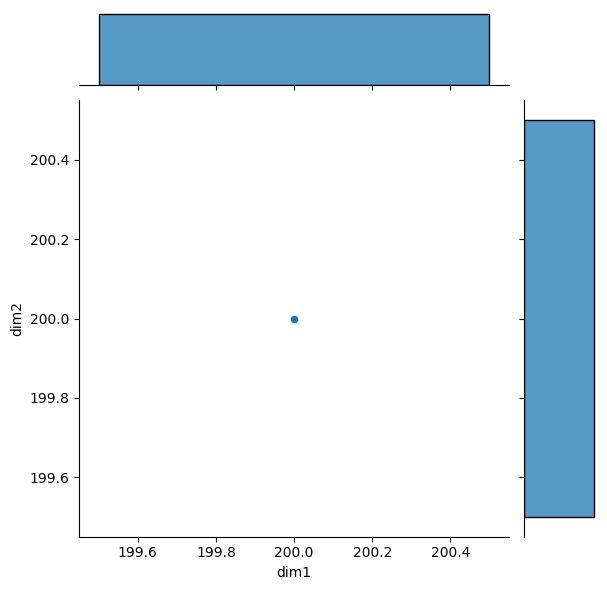

In [ ]:
data = pd.DataFrame({
    'dim1': dim1,
    'dim2': dim2
})
sns.jointplot(x='dim1', y='dim2', data = data)

In [ ]:
np.mean(dim1)

200.0

In [ ]:
np.mean(dim2)

200.0

#Pretraitement des donnes

Regroupan les donnes dans un datafram

In [ ]:
dir_names = []
for dirname, _, filenames in os.walk(directory):
    for filename in filenames:
        dir_name = os.path.join(dirname, filename)
        dir_names.append(dir_name)

print(len(dir_names))

30000


In [ ]:
paths = []
labels = []
for i in range(len(dir_names)):
    label = dir_names[i].split("/")[-2].lower()
    paths.append(dir_names[i])
    labels.append(label)

In [ ]:
data_frame = pd.DataFrame()
data_frame['path'] = paths
data_frame['label'] = labels

In [ ]:
data_frame

,path,label
0,/root/.cache/kagglehub/datasets/dineshpiyasama...,triangle
1,/root/.cache/kagglehub/datasets/dineshpiyasama...,triangle
2,/root/.cache/kagglehub/datasets/dineshpiyasama...,triangle
3,/root/.cache/kagglehub/datasets/dineshpiyasama...,triangle
4,/root/.cache/kagglehub/datasets/dineshpiyasama...,triangle
...,...,...
29995,/root/.cache/kagglehub/datasets/dineshpiyasama...,square
29996,/root/.cache/kagglehub/datasets/dineshpiyasama...,square
29997,/root/.cache/kagglehub/datasets/dineshpiyasama...,square
29998,/root/.cache/kagglehub/datasets/dineshpiyasama...,square


In [ ]:
data_frame['label'].value_counts().to_frame()

,count
label,
triangle,10000
circle,10000
square,10000


Regroupant les donnnes en Donne d'entrainement et de test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_train, data_test = train_test_split(data_frame, random_state=1, test_size=1/6)
data_train, data_val = train_test_split(data_train, random_state= 1, test_size=0.2)

In [ ]:
data_train.shape, data_test.shape, data_val.shape

((20000, 2), (5000, 2), (5000, 2))

In [ ]:
data_train.head()

,path,label
13784,/root/.cache/kagglehub/datasets/dineshpiyasama...,circle
20961,/root/.cache/kagglehub/datasets/dineshpiyasama...,square
26577,/root/.cache/kagglehub/datasets/dineshpiyasama...,square
20922,/root/.cache/kagglehub/datasets/dineshpiyasama...,square
15379,/root/.cache/kagglehub/datasets/dineshpiyasama...,circle


In [ ]:
data_test.head()

,path,label
10747,/root/.cache/kagglehub/datasets/dineshpiyasama...,circle
12573,/root/.cache/kagglehub/datasets/dineshpiyasama...,circle
29676,/root/.cache/kagglehub/datasets/dineshpiyasama...,square
8856,/root/.cache/kagglehub/datasets/dineshpiyasama...,triangle
21098,/root/.cache/kagglehub/datasets/dineshpiyasama...,square


In [ ]:
data_val.head()

,path,label
19923,/root/.cache/kagglehub/datasets/dineshpiyasama...,circle
15967,/root/.cache/kagglehub/datasets/dineshpiyasama...,circle
16922,/root/.cache/kagglehub/datasets/dineshpiyasama...,circle
4847,/root/.cache/kagglehub/datasets/dineshpiyasama...,triangle
23929,/root/.cache/kagglehub/datasets/dineshpiyasama...,square


Voyant combient d'element pour chaque form existe dans les donne d'entrainement

In [ ]:
data_train['label'].value_counts().to_frame()

,count
label,
circle,6690
triangle,6663
square,6647


Representant les diagrammes convenables

<Axes: xlabel='label'>

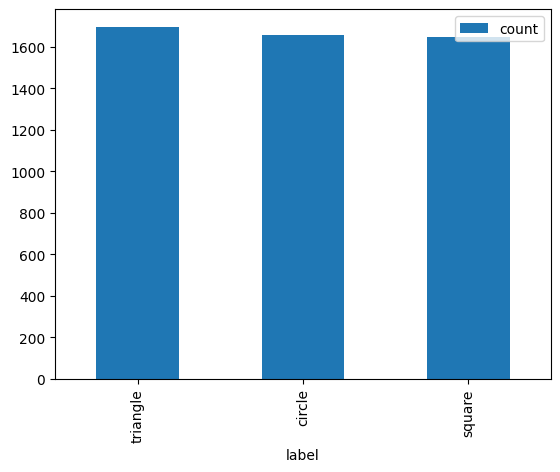

In [ ]:
data_test['label'].value_counts().to_frame().plot(kind='bar')

<Axes: xlabel='label'>

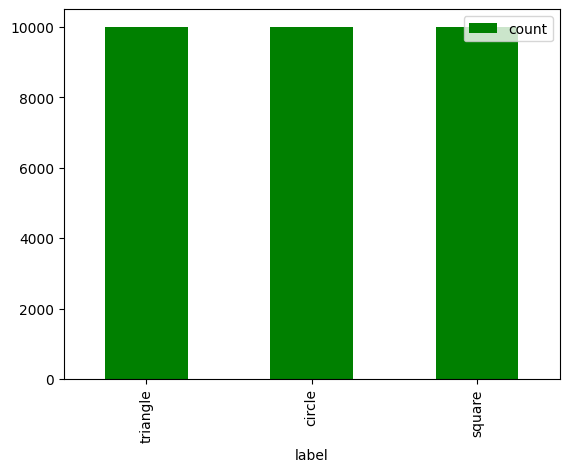

In [ ]:
data_train['label'].value_counts().to_frame().plot(kind='bar', color = 'green')

Convertissant les donnes categorique en donnes numerique

In [ ]:
def label_to_onehot_vector(df):
    label_columns = ['circle', 'square', 'triangle']
    df_one_hot = pd.get_dummies(df['label'], columns=label_columns)
    df = pd.concat([df, df_one_hot], axis=1)
    df[label_columns] = df[label_columns].astype(int)
    df = df.sample(frac=1).reset_index(drop=True)
    return df

In [ ]:
data_train = label_to_onehot_vector(data_train)
data_test = label_to_onehot_vector(data_test)
data_val = label_to_onehot_vector(data_val)

In [ ]:
data_train.head()

,path,label,circle,square,triangle
0,/root/.cache/kagglehub/datasets/dineshpiyasama...,square,0,1,0
1,/root/.cache/kagglehub/datasets/dineshpiyasama...,triangle,0,0,1
2,/root/.cache/kagglehub/datasets/dineshpiyasama...,square,0,1,0
3,/root/.cache/kagglehub/datasets/dineshpiyasama...,circle,1,0,0
4,/root/.cache/kagglehub/datasets/dineshpiyasama...,circle,1,0,0


In [ ]:
data_test.head()

,path,label,circle,square,triangle
0,/root/.cache/kagglehub/datasets/dineshpiyasama...,triangle,0,0,1
1,/root/.cache/kagglehub/datasets/dineshpiyasama...,triangle,0,0,1
2,/root/.cache/kagglehub/datasets/dineshpiyasama...,square,0,1,0
3,/root/.cache/kagglehub/datasets/dineshpiyasama...,triangle,0,0,1
4,/root/.cache/kagglehub/datasets/dineshpiyasama...,triangle,0,0,1


In [ ]:
data_val.head()

,path,label,circle,square,triangle
0,/root/.cache/kagglehub/datasets/dineshpiyasama...,triangle,0,0,1
1,/root/.cache/kagglehub/datasets/dineshpiyasama...,square,0,1,0
2,/root/.cache/kagglehub/datasets/dineshpiyasama...,square,0,1,0
3,/root/.cache/kagglehub/datasets/dineshpiyasama...,circle,1,0,0
4,/root/.cache/kagglehub/datasets/dineshpiyasama...,square,0,1,0


In [ ]:
labels = ['circle', 'square', 'triangle']
num_labales = len(labels)
print(num_labales)

3


Representant quelques images

(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)


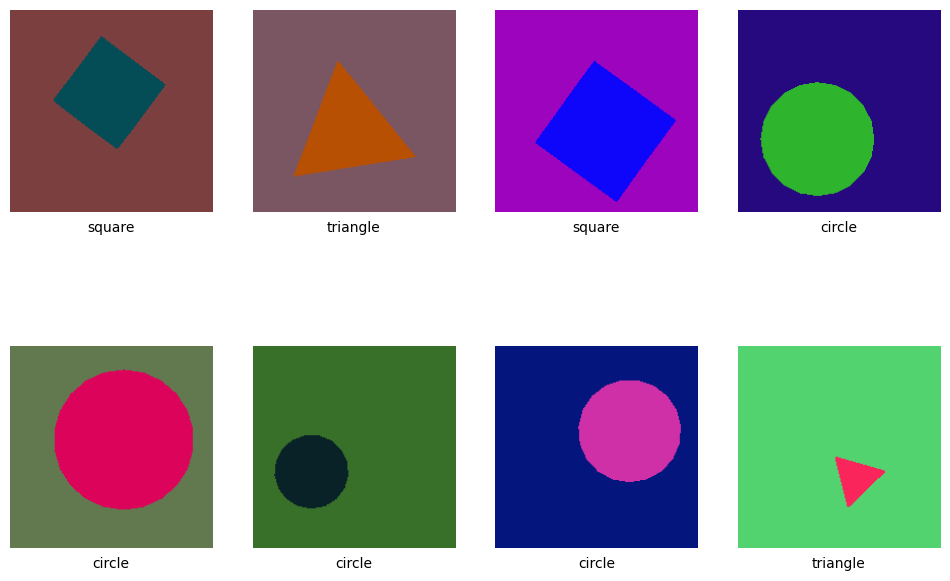

In [ ]:
from PIL import Image

row_num = 2
col_num = 4

#configurant la taille de la figure
fig, axes = plt.subplots(row_num, col_num, figsize=(12, 8))

for i in range(row_num):
    for j in range(col_num):
        index = i * col_num + j
        if index < len(data_train):
          im = Image.open(data_train.iloc[index]['path'])
          img = np.array(im)
          print(img.shape)
          axes[i, j].imshow(img)
          axes[i, j].axis('off')

          label = data_train.iloc[index]['label']
          axes[i, j].text(0.5, -0.1, label, ha='center', transform=axes[i, j].transAxes)

plt.show()


##Manipulation des images

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_generator = ImageDataGenerator(
    rescale = 1.0 / 255,
)
test_data_generator = ImageDataGenerator(
    rescale = 1.0 / 255,
)

In [ ]:
train_generator = img_generator.flow_from_dataframe(
    dataframe=data_train,
    x_col="path",
    y_col=labels,
    batch_size=32,
    shuffle=True,
    class_mode="raw",
    target_size=(224, 224),
)

val_generator = img_generator.flow_from_dataframe(
    dataframe=data_val,
    x_col="path",
    y_col=labels,
    batch_size=32,
    shuffle=True,
    class_mode="raw",
    target_size=(224, 224),
)

test_generator = test_data_generator.flow_from_dataframe(
    dataframe=data_test,
    x_col="path",
    y_col=labels,
    batch_size=32,
    shuffle=True,
    class_mode="raw",
    target_size=(224, 224),
)


Found 20000 validated image filenames.
Found 5000 validated image filenames.
Found 5000 validated image filenames.


In [ ]:
train_generator.n

20000

Utilisant la fonction du callback pour eviter le surapprentissage


In [ ]:
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

def call_back(checkpoint_path):
    early_stopping_callback = EarlyStopping(
        patience=10,
        monitor = 'val_loss',
        restore_best_weights=True,
        verbose= 1,
    )
    checkpoint_dir = os.path.dirname(checkpoint_path)

    checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_path,
        save_weights_only=True,
        monitor= 'val_loss',
        save_best_only=True,
        mode = 'min',
        verbose= 1,
    )
    return early_stopping_callback, checkpoint_callback

In [ ]:
checkpoint_path = "https://storage.googleapis.com/tensorflow/keras-applications/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.weights.h5"
early_stopping_callback, checkpoint_callback= call_back(
    checkpoint_path
)

##Creation du Model

Utilisant le model de classification ResNet50, <br>
specialise dans la classification des images forme sur de grands ensembles de donnes

In [ ]:
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import Adam

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


model = Sequential()

model.add(base_model)


model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_labales, activation='softmax'))


for layer in base_model.layers:
    layer.trainable = False


model.compile(optimizer=Adam(learning_rate=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,113,027 (91.98 MB)

 Trainable params: 525,315 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

#Entrainement du model

In [ ]:
hist = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=200,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[checkpoint_callback, early_stopping_callback],
    verbose= 1
)

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


416/625 ━━━━━━━━━━━━━━━━━━━━ 23:50 7s/step - accuracy: 0.3298 - loss: 2.6111

Representant loss et accuracy

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(hist.history["loss"], label="loss")
plt.plot(hist.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(hist.history["accuracy"], label="accuracy")
plt.plot(hist.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

#Evaluation du model

In [ ]:
model.load_weights(checkpoint_path)
loss, acc = model.evaluate(test_generator, steps=len(test_generator), verbose=2)

print(f"Test Loss: {loss}\nTest Accuracy: {acc}")

In [ ]:
from sklearn.metrics import precision_score, recall_score, average_precision_score

true_labels = []
predicted_labels = []

for i in range(len(test_generator)):
    images, labelss = test_generator[i]
    true_labels.extend(labelss)

    predictions = model.predict(images, verbose=0)

    binary_predictions = (predictions > 0.5).astype(int)
    predicted_labels.extend(binary_predictions)

true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

per_class_precision = precision_score(true_labels, predicted_labels, average=None)
per_class_recall = recall_score(true_labels, predicted_labels, average=None)

ap_scores = average_precision_score(true_labels, predicted_labels, average=None)

map_score = np.mean(ap_scores)

for label, precision, recall, ap in zip(
    labels, per_class_precision, per_class_recall, ap_scores
):
    print(f"Label: {label}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"AP: {ap}")
    print("-" * 30)

print(f"mAP: {map_score}")

Faisant des predictions

In [ ]:
print(labels)

In [ ]:
def decode_predictions(predict):
    max_confidence = 0
    predicted_label = None

    for i in range(len(predict[0])):
        if predict[0][i] > max_confidence:
            max_confidence = predict[0][i]
            predicted_label = labels[i]

    return predicted_label, round(max_confidence, 4)

def predict_image(test_predict):
    test_predict_path = test_predict['path']
    true_label = test_predict['label']
    image = keras.preprocessing.image.load_img(test_predict_path, target_size=(224, 224))
    image = keras.preprocessing.image.img_to_array(image)
    image = image.reshape((1,) + image.shape)
    image /= 255.0
    result = model.predict(image, verbose = 0)
#     print(result)
    y_pro, confidence = decode_predictions(result)
    return y_pro, confidence

on predir la form de cette image

In [ ]:
predict_image(data_test.iloc[0])

creant une fonction de comapraison des predictions du model par rapport a la vrai forme geometrique <br>sur des images choisi aleatoirement

In [ ]:
def plot_random_predictions(model, test_data, num_rows=2, num_cols=4):
    random_samples = random.sample(range(len(test_data)), num_rows * num_cols)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

    for i in range(num_rows):
        for j in range(num_cols):
            index = i * num_cols + j
            if index < len(random_samples):
                sample_index = random_samples[index]

                im = Image.open(test_data.iloc[sample_index]['path'])
                img = np.array(im)

                axes[i, j].imshow(img)

                real_label = test_data.iloc[sample_index]['label']
                predicted_label, confidence = predict_image(test_data.iloc[sample_index])

                axes[i, j].text(0.5, -0.2, f'Real: {real_label}', ha='center', transform=axes[i, j].transAxes,
                                color='green' if real_label == predicted_label else 'red')

                axes[i, j].text(0.5, -0.4, f'Predicted: {predicted_label}', ha='center',
                                transform=axes[i, j].transAxes, color='green' if real_label == predicted_label else 'red')

    plt.show()

In [ ]:
plot_random_predictions(model, data_test)